In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/banana_quality_dataset.csv")
df.head() #check out the data table

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [3]:
df.info() #check out the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [4]:
df.variety.unique()

array(['Manzano', 'Plantain', 'Burro', 'Red Dacca', 'Fehi', 'Lady Finger',
       'Blue Java', 'Cavendish'], dtype=object)

In [5]:
# Simple Linear Regression: quality_score = alpha + beta * ripeness_index
X_simple = df[['ripeness_index']]
y = df['quality_score']

# Fit the model
simple_model = LinearRegression()
simple_model.fit(X_simple, y)

#  Report coefficients
beta_simple = simple_model.coef_[0]
alpha_simple = simple_model.intercept_

print(f"Simple Linear Regression: quality_score = {alpha_simple:.2f} + {beta_simple:.2f} * ripeness_index")

# Evaluate the model
y_pred_simple = simple_model.predict(X_simple)
mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Mean Squared Error (Simple): {mse_simple:.2f}")

# Step 2: Multiple Linear Regression with ripeness_index and sugar_content_brix
X_multiple = df[['ripeness_index', 'sugar_content_brix']]

# Fit the model
multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y)

# Report coefficients
beta_ripeness = multiple_model.coef_[0]
gamma_sugar = multiple_model.coef_[1]
alpha_multiple = multiple_model.intercept_

print(f"Multiple Linear Regression: quality_score = {alpha_multiple:.2f} + {beta_ripeness:.2f} * ripeness_index + {gamma_sugar:.2f} * sugar_content_brix")

# Evaluate the model
y_pred_multiple = multiple_model.predict(X_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)
print(f"Mean Squared Error (Multiple): {mse_multiple:.2f}")

# Step 3: Correlation between ripeness_index and sugar_content_brix
corr_ripeness_sugar = df['ripeness_index'].corr(df['sugar_content_brix'])
print(f"Correlation between ripeness_index and sugar_content_brix: {corr_ripeness_sugar:.2f}")

# Step 4: Multiple Linear Regression with ripeness_index, sugar_content_brix, and firmness_kgf
X_multiple_firmness_kgf = df[['ripeness_index', 'sugar_content_brix', 'firmness_kgf']]

# Fit the multiple linear regression model with firmness_kgf
multiple_firmness_kgf_model = LinearRegression()
multiple_firmness_kgf_model.fit(X_multiple_firmness_kgf, y)

# Report the coefficients
beta_ripeness_firmness_kgf = multiple_firmness_kgf_model.coef_[0]
gamma_sugar_firmness_kgf = multiple_firmness_kgf_model.coef_[1]
delta_firmness_kgf = multiple_firmness_kgf_model.coef_[2]
alpha_firmness_kgf = multiple_firmness_kgf_model.intercept_

print(f"Multiple Linear Regression (with firmness_kgf): quality_score = {alpha_firmness_kgf:.2f} + {beta_ripeness_firmness_kgf:.2f} * ripeness_index + {gamma_sugar_firmness_kgf:.2f} * sugar_content_brix + {delta_firmness_kgf:.2f} * firmness_kgf")

# Evaluate the model
y_pred_firmness_kgf = multiple_firmness_kgf_model.predict(X_multiple_firmness_kgf)
mse_firmness_kgf = mean_squared_error(y, y_pred_firmness_kgf)
print(f"Mean Squared Error (Multiple with firmness_kgf): {mse_firmness_kgf:.2f}")

# Step 5: Correlation matrix for ripeness_index, sugar_content_brix, and firmness_kgf
corr_matrix = df[['ripeness_index', 'sugar_content_brix', 'firmness_kgf']].corr()
print(f"Correlation Matrix:\n{corr_matrix}")

Simple Linear Regression: quality_score = 1.62 + 0.21 * ripeness_index
Mean Squared Error (Simple): 0.16
Multiple Linear Regression: quality_score = -1.24 + 0.20 * ripeness_index + 0.16 * sugar_content_brix
Mean Squared Error (Multiple): 0.06
Correlation between ripeness_index and sugar_content_brix: 0.03
Multiple Linear Regression (with firmness_kgf): quality_score = -1.17 + 0.20 * ripeness_index + 0.16 * sugar_content_brix + -0.02 * firmness_kgf
Mean Squared Error (Multiple with firmness_kgf): 0.06
Correlation Matrix:
                    ripeness_index  sugar_content_brix  firmness_kgf
ripeness_index            1.000000            0.027318     -0.005850
sugar_content_brix        0.027318            1.000000     -0.013572
firmness_kgf             -0.005850           -0.013572      1.000000


# **ONE-HOT ENCODING VARIETY AND REPORTING ALL THE COEFFICIENTS**

In [6]:
# One-hot encoding for the variety column. changing burro cavendish fehi etc to numerical values we can work with
df_encoded = pd.get_dummies(df, columns=['variety'], drop_first=True)

# Define independent and dependent variables for the final model
X_encoded = df_encoded[['ripeness_index', 'sugar_content_brix', 'firmness_kgf'] + [col for col in df_encoded.columns if 'variety' in col]]
y_encoded = df_encoded['quality_score']

# Fit the multiple linear regression model with one-hot encoding for banana variety
encoded_model = LinearRegression()
encoded_model.fit(X_encoded, y_encoded)

# Report the coefficients
coefficients = pd.DataFrame(encoded_model.coef_, X_encoded.columns, columns=['Coefficient'])
print(f"Multiple Linear Regression (with one-hot encoding for variety):\n{coefficients}")

# Evaluate the model
y_pred_encoded = encoded_model.predict(X_encoded)
mse_encoded = mean_squared_error(y_encoded, y_pred_encoded)
print(f"Mean Squared Error (One-hot Encoding for Variety): {mse_encoded:.2f}")

Multiple Linear Regression (with one-hot encoding for variety):
                     Coefficient
ripeness_index          0.205268
sugar_content_brix      0.156339
firmness_kgf           -0.022908
variety_Burro          -0.018627
variety_Cavendish      -0.075481
variety_Fehi           -0.031022
variety_Lady Finger    -0.063155
variety_Manzano         0.004623
variety_Plantain       -0.079541
variety_Red Dacca      -0.025337
Mean Squared Error (One-hot Encoding for Variety): 0.06


#**MODELS**

               Feature  Coefficients
0       ripeness_index      0.205268
1   sugar_content_brix      0.156339
2         firmness_kgf     -0.022908
3        variety_Burro     -0.018627
4    variety_Cavendish     -0.075481
5         variety_Fehi     -0.031022
6  variety_Lady Finger     -0.063155
7      variety_Manzano      0.004623
8     variety_Plantain     -0.079541
9    variety_Red Dacca     -0.025337


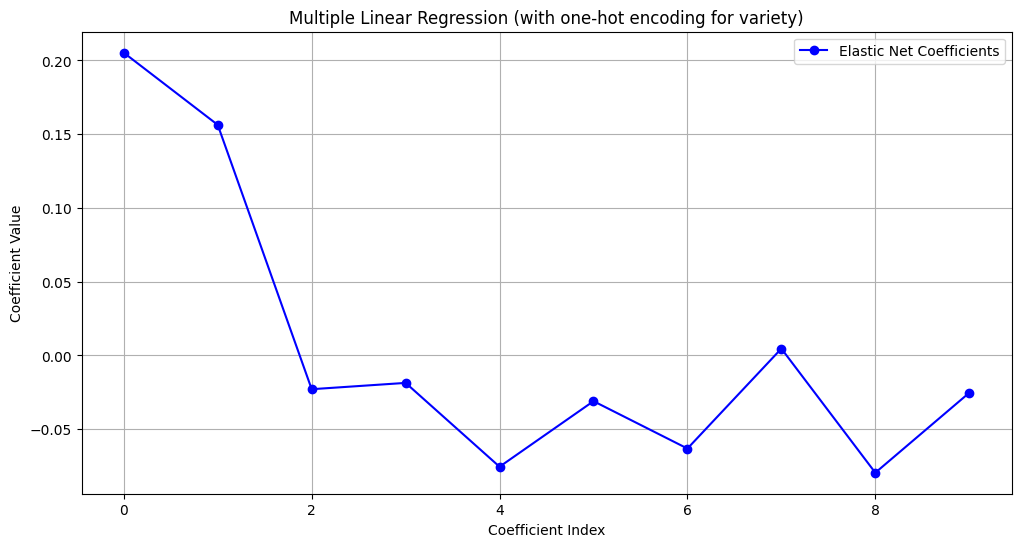

In [12]:
coeff_df = pd.DataFrame(X_encoded.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficients"] = pd.Series(encoded_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(encoded_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Multiple Linear Regression (with one-hot encoding for variety)")
plt.legend()
plt.grid(True)
plt.show()

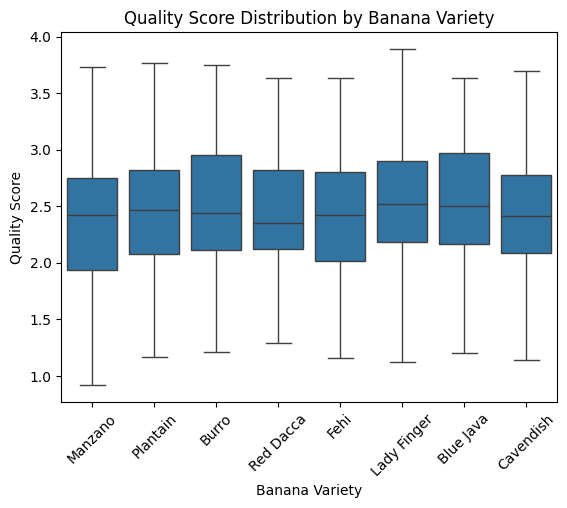

In [8]:
# box plot for quality_score by banana variety
sns.boxplot(x='variety', y='quality_score', data=df)
plt.title('Quality Score Distribution by Banana Variety')
plt.xlabel('Banana Variety')
plt.ylabel('Quality Score')
plt.xticks(rotation=45)
plt.show()


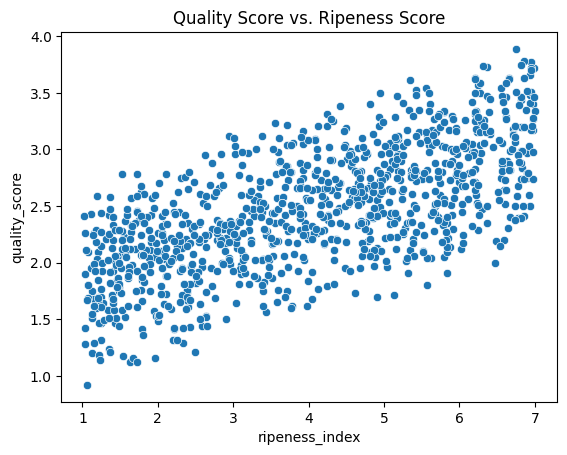

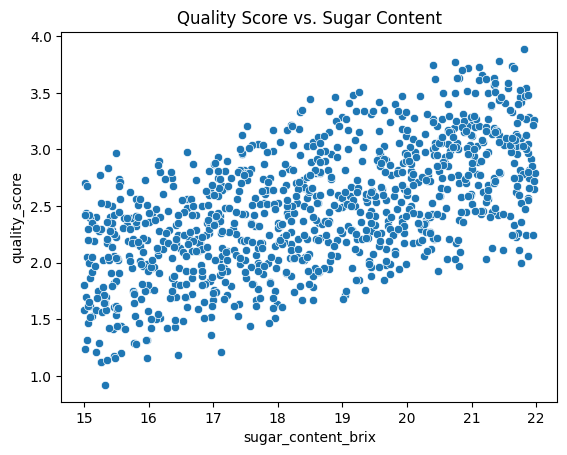

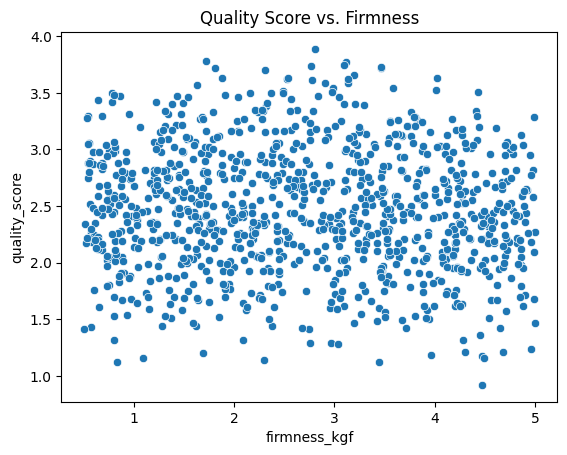

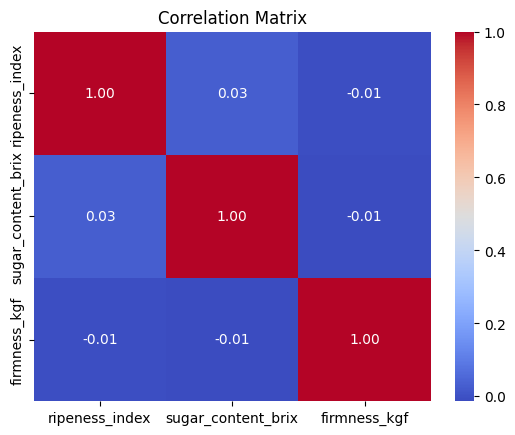

In [9]:
# Scatterplot for quality_score vs. ripeness_index
sns.scatterplot(x='ripeness_index', y='quality_score', data=df)
plt.title("Quality Score vs. Ripeness Score")
plt.show()

# Scatterplot for quality_score vs. sugar_content_brix
sns.scatterplot(x='sugar_content_brix', y='quality_score', data=df)
plt.title("Quality Score vs. Sugar Content")
plt.show()

# Scatterplot for quality_score vs. firmness_kgf
sns.scatterplot(x='firmness_kgf', y='quality_score', data=df)
plt.title("Quality Score vs. Firmness")
plt.show()

# Correlation matrix heatmap for ripeness_index, sugar_content_brix, and firmness_kgf
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

